# Logstic Regression course

In [12]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

plt.style.use('default')

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [13]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [14]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


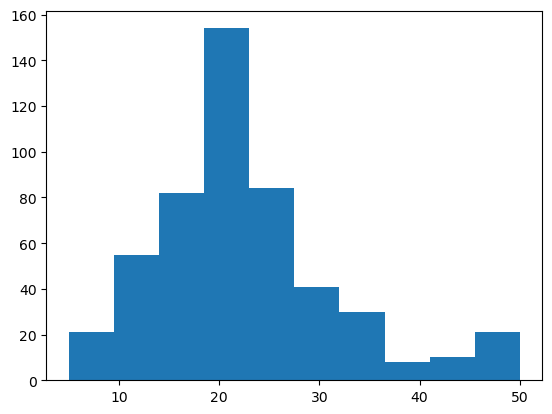

In [15]:
plt.hist(price)
plt.show()

In [16]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [17]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

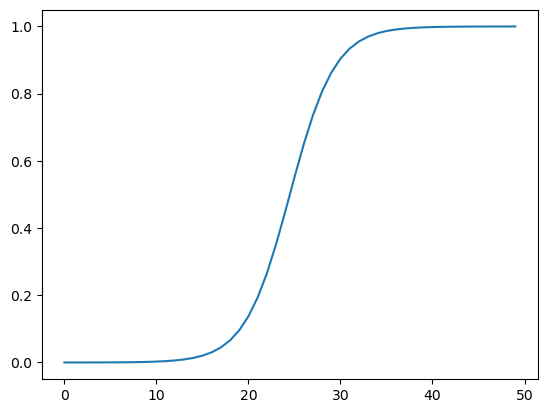

In [18]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [19]:
w = np.random.random_sample((1, 2))
b = 0

In [20]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:12.8050058038068
Epoch: 0, Batch: 100, loss:0.0003920002267195514
Epoch: 0, Batch: 200, loss:21.820222738985606
Epoch: 0, Batch: 300, loss:13.244056498233574
Epoch: 0, Batch: 400, loss:1.8502269356583645e-05
Epoch: 0, Batch: 500, loss:0.0005577733537313669
Epoch: 1, Batch: 0, loss:0.00029696363904904537
Epoch: 1, Batch: 100, loss:19.81904418750143
Epoch: 1, Batch: 200, loss:18.611807067550174
Epoch: 1, Batch: 300, loss:19.6131655410749
Epoch: 1, Batch: 400, loss:19.39374289725528
Epoch: 1, Batch: 500, loss:14.984618238613502
Epoch: 2, Batch: 0, loss:0.0009676105959095912
Epoch: 2, Batch: 100, loss:15.450798976960595
Epoch: 2, Batch: 200, loss:0.00022226966013913504
Epoch: 2, Batch: 300, loss:25.931202348840653
Epoch: 2, Batch: 400, loss:15.882541358652174
Epoch: 2, Batch: 500, loss:13.525473414479219
Epoch: 3, Batch: 0, loss:0.00024349341326580364
Epoch: 3, Batch: 100, loss:0.00020016999998843718
Epoch: 3, Batch: 200, loss:0.00029930147991887013
Epoch: 3, Batch

In [21]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5



for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

boston_labels = np.array

RM:6.968, LSTAT:4.59, EXPENSIVE:1, Predicated:1
RM:5.427, LSTAT:18.14, EXPENSIVE:0, Predicated:0
RM:8.398, LSTAT:5.91, EXPENSIVE:1, Predicated:1
RM:6.982, LSTAT:4.86, EXPENSIVE:1, Predicated:1
RM:7.267, LSTAT:6.05, EXPENSIVE:1, Predicated:1
RM:6.43, LSTAT:5.21, EXPENSIVE:1, Predicated:1
RM:6.037, LSTAT:8.01, EXPENSIVE:0, Predicated:0
RM:5.807, LSTAT:16.03, EXPENSIVE:0, Predicated:0
RM:5.981, LSTAT:11.65, EXPENSIVE:1, Predicated:0
RM:6.316, LSTAT:5.68, EXPENSIVE:0, Predicated:1
RM:5.468, LSTAT:26.42, EXPENSIVE:0, Predicated:0
RM:6.485, LSTAT:18.85, EXPENSIVE:0, Predicated:0
RM:5.963, LSTAT:13.45, EXPENSIVE:0, Predicated:0
RM:6.635, LSTAT:5.99, EXPENSIVE:1, Predicated:1
RM:6.113, LSTAT:12.73, EXPENSIVE:0, Predicated:0
RM:6.31, LSTAT:6.75, EXPENSIVE:0, Predicated:1
RM:6.144, LSTAT:9.45, EXPENSIVE:1, Predicated:0
RM:5.966, LSTAT:14.44, EXPENSIVE:0, Predicated:0
RM:6.8, LSTAT:5.03, EXPENSIVE:1, Predicated:1
RM:6.047, LSTAT:17.28, EXPENSIVE:0, Predicated:0
RM:5.856, LSTAT:13.0, EXPENSIVE:0, 

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_26483/2603075225.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicate_label = int(predicate > decision_boundary)


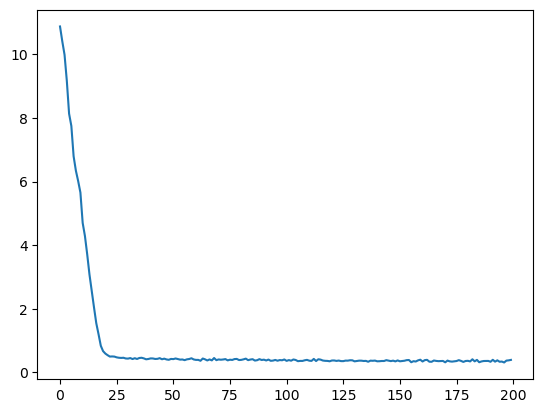

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(losses)

In [23]:
true_label = np.array([1, 0, 1, 0, 1]) # 二分类
predicate_1 = np.array([0.8, 0.7, 0.8, 0.3, 0.8])

In [24]:
def test_lose(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [25]:
test_lose(true_label, predicate_1)

np.float64(2.2300784022072975)

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)